In [1]:
import becquerel as bq
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from bs4 import BeautifulSoup
import utils
import scipy.interpolate as interpolate



/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/rebin.py:57: RebinWarning: The last input edge is smaller than the last output edge, zeros will padded on the right side of the new spectrum
  warnings.warn(
/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/spectrum.py:837: SpectrumWarning: Subtraction of counts-based specta, spectra have been converted to CPS
  warnings.warn(


<Axes: xlabel='Energy [keV]', ylabel='Countrate [1/s]'>

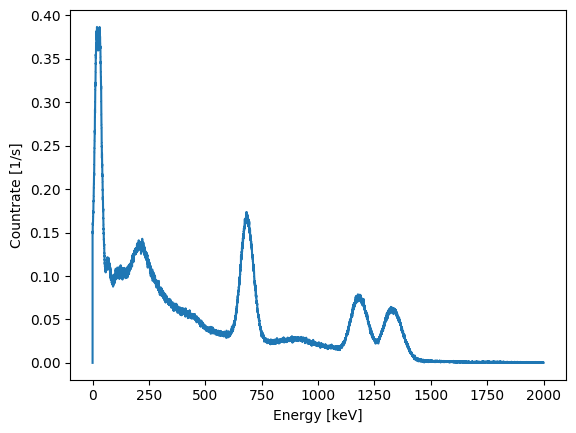

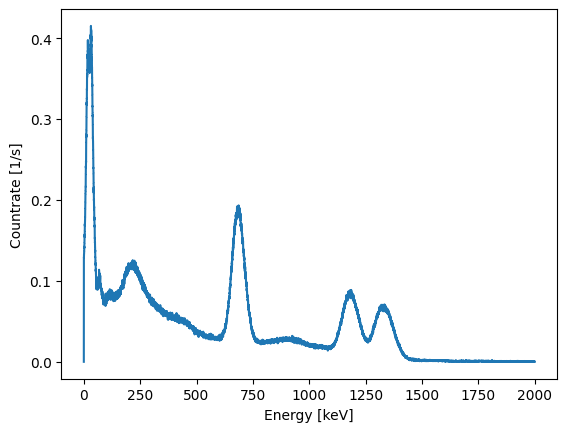

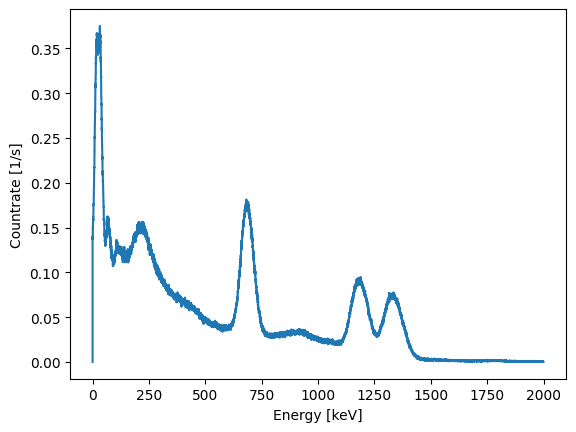

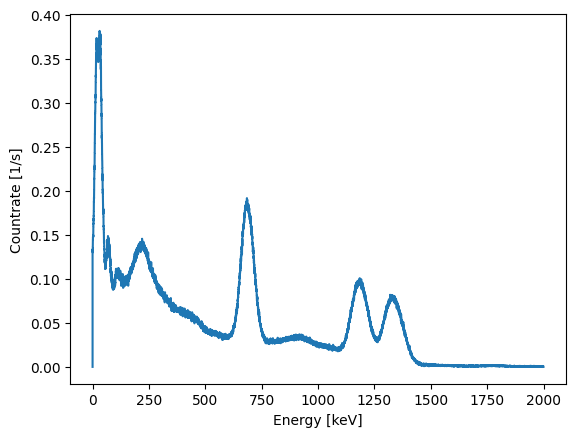

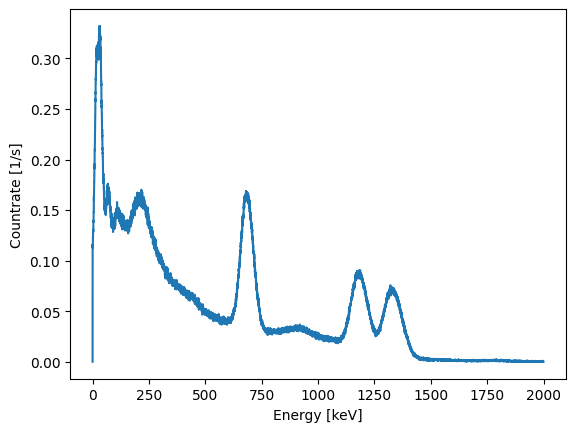

In [2]:
bottle_1 = utils.get_corrected_spectrum("serial_2275411")
bottle_2 = utils.get_corrected_spectrum("serial_2275412")
bottle_3 = utils.get_corrected_spectrum("serial_2339311")
bottle_4 = utils.get_corrected_spectrum("serial_2339312")
bottle_5 = utils.get_corrected_spectrum("serial_2339314")

bottle_1.plot()
bottle_2.plot()
bottle_3.plot()
bottle_4.plot()
bottle_5.plot()

# soil_1 = utils.get_corrected_spectrum("soil_tailing11")
# soil_1.plot()

# soil_1_uncorrect = utils.get_uncorrected_spectrum("soil_tailing11")
# soil_1_uncorrect.plot()

# juicer = utils.get_corrected_spectrum("antique_juicer")
# juicer.plot()

# mug = utils.get_corrected_spectrum("antique_mug")
# mug.plot()
# mug_uncorrect = utils.get_uncorrected_spectrum("antique_mug")
# mug_uncorrect.plot()

# watch = utils.get_corrected_spectrum("antique_watch")
# watch.plot()

# soil_low = utils.get_corrected_spectrum("soil_tailing11")
# soil_medium = utils.get_corrected_spectrum("soil_tailing3")
# soil_high = utils.get_corrected_spectrum("soil_openpit")




/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/fitting.py:987: FittingWarning: `lmfit` error estimates are unreliable. `minuit` is recommended where possible
  warnings.warn(


99.75237057552962


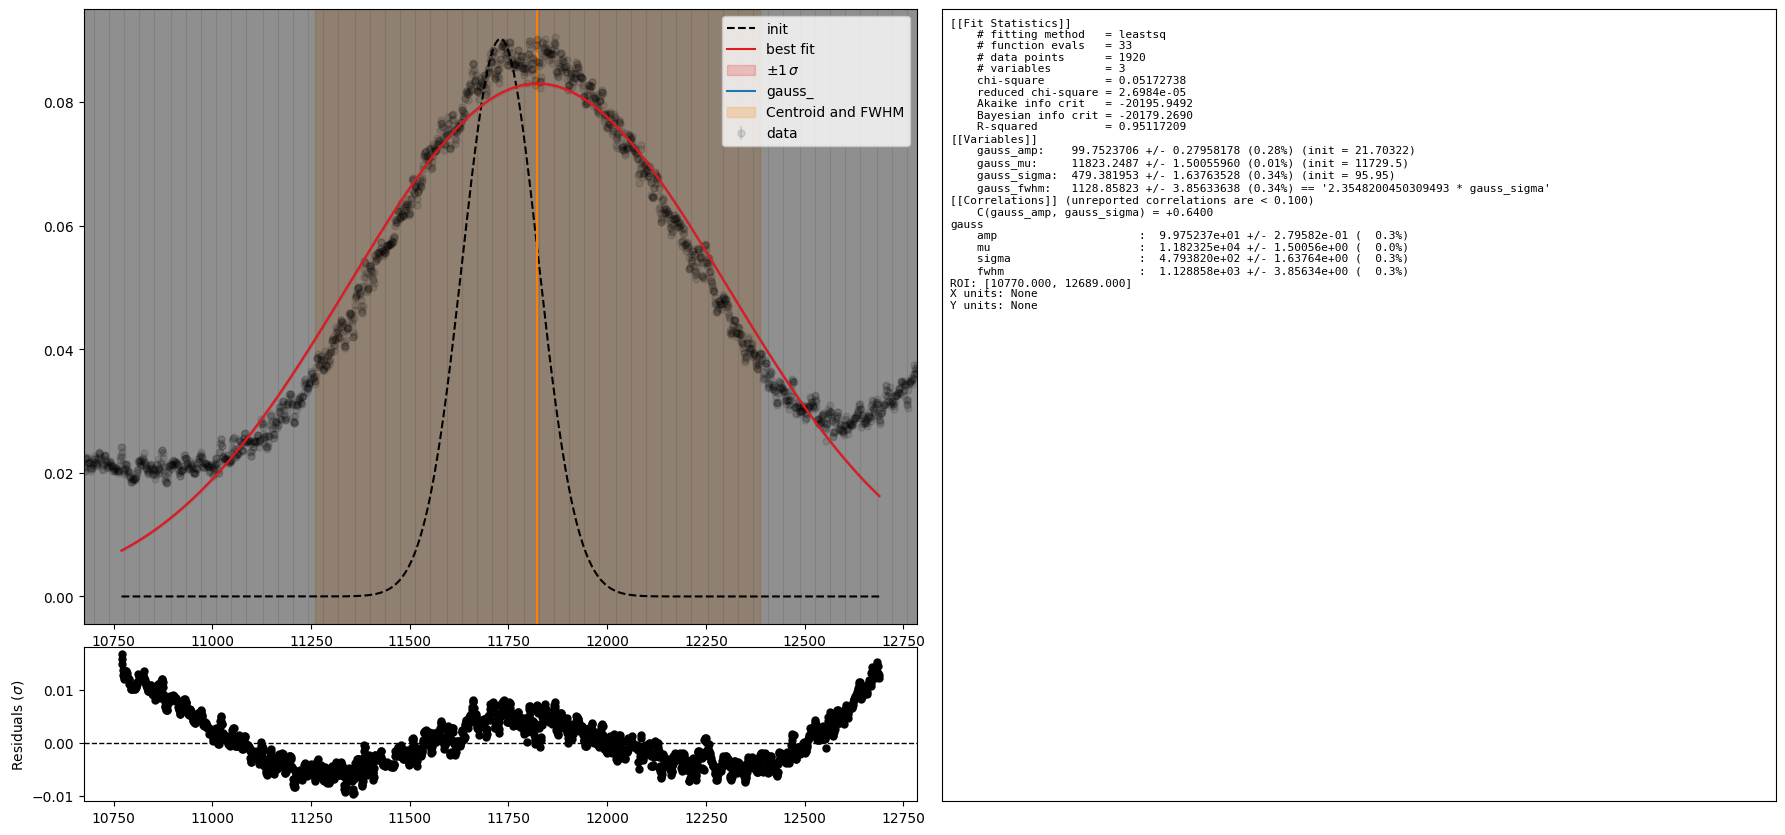

In [8]:
cps, fitter = utils.get_cps_peak(bottle_5, 1173)
# fitter = utils.get_cps_peak(soil_1, (662*30/32))

fitter.custom_plot(residual_type="sigma", dpi=500)

print(cps)

In [38]:
print("Start geometric efficiency calibration...")
calibration_names = ["2275411", "2275412",
                        "2339312", "2339314",
                        "2339311"]
manifest = utils.read_manifest()  # dict of bottle info
efficiencies = utils.read_efficiencies()  # dict of efficiencies

bottle_efficiencies = {}
# read in calibration bottles
for name in calibration_names:
    # note that this uses 20_000 bins from 0 to 2_000 keV
    spectrum = utils.get_corrected_spectrum(f'serial_{name}')

    # get cps under specific peaks: 662, 1173, 1333
    bottle_efficiencies[name] = {}
    peaks = [60, 662, 1173, 1333]
    gamma_info = manifest[name]['gamma_info']
    for peak in peaks:
        cps, _ = utils.get_cps_peak(spectrum, peak)
        if peak == 60:
            cps *= 0.36
        overall_efficiency = cps / gamma_info[gamma_info['energy'] == peak]['activity_cps'].values[0]
        # intrinsic_efficiency = efficiencies[peak]
        geometry_efficiency = overall_efficiency #/ intrinsic_efficiency
        bottle_efficiencies[name][peak] = geometry_efficiency
print(bottle_efficiencies)

# energy_splines = {}
energy_points = {}
# setup spline interpolation with volumes and densities resulting in efficiencies per energy
volumes = [manifest[name]['volume'] for name in calibration_names]
densities = [manifest[name]['density'] for name in calibration_names]
efficiencies = [bottle_efficiencies[name][662] for name in calibration_names]
# energy_splines[662] = interpolate.bisplrep(volumes, densities, efficiencies)
energy_points[662] = {"volumes": volumes, "densities": densities, "efficiencies": efficiencies}

volumes = [manifest[name]['volume'] for name in calibration_names]
densities = [manifest[name]['density'] for name in calibration_names]
efficiencies = [bottle_efficiencies[name][1173] for name in calibration_names]
# energy_splines[1173] = interpolate.bisplrep(volumes, densities, efficiencies)
energy_points[1173] = {"volumes": volumes, "densities": densities, "efficiencies": efficiencies}

volumes = [manifest[name]['volume'] for name in calibration_names]
densities = [manifest[name]['density'] for name in calibration_names]
efficiencies = [bottle_efficiencies[name][1333] for name in calibration_names]
# energy_splines[1333] = interpolate.bisplrep(volumes, densities, efficiencies)
energy_points[1333] = {"volumes": volumes, "densities": densities, "efficiencies": efficiencies}

Start geometric efficiency calibration...


/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/rebin.py:57: RebinWarning: The last input edge is smaller than the last output edge, zeros will padded on the right side of the new spectrum
  warnings.warn(
/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/spectrum.py:837: SpectrumWarning: Subtraction of counts-based specta, spectra have been converted to CPS
  warnings.warn(
/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/fitting.py:987: FittingWarning: `lmfit` error estimates are unreliable. `minuit` is recommended where possible
  warnings.warn(
/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/fitting.py:987: FittingWarning: `lmfit` error estimates are unreliable. `minuit` is recommended where possible
  warnings.warn(
/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/fitting.py:987: FittingWarnin

{'2275411': {60: np.float64(0.027402993665809734), 662: np.float64(0.025007564546899525), 1173: np.float64(0.011957817376658606), 1333: np.float64(0.011251155491749678)}, '2275412': {60: np.float64(0.01707369957285282), 662: np.float64(0.026755380822728974), 1173: np.float64(0.012956458279961173), 1333: np.float64(0.012227401020471526)}, '2339312': {60: np.float64(0.01336492972135464), 662: np.float64(0.02701949388531608), 1173: np.float64(0.013949984374012502), 1333: np.float64(0.013480328245088189)}, '2339314': {60: np.float64(0.0186081861662128), 662: np.float64(0.025255862555130848), 1173: np.float64(0.012890268168171706), 1333: np.float64(0.011971972422376988)}, '2339311': {60: np.float64(0.01634239874559264), 662: np.float64(0.026425818470015926), 1173: np.float64(0.013602654571341785), 1333: np.float64(0.012984466700077177)}}


/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/fitting.py:987: FittingWarning: `lmfit` error estimates are unreliable. `minuit` is recommended where possible
  warnings.warn(
/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/fitting.py:987: FittingWarning: `lmfit` error estimates are unreliable. `minuit` is recommended where possible
  warnings.warn(
/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/fitting.py:987: FittingWarning: `lmfit` error estimates are unreliable. `minuit` is recommended where possible
  warnings.warn(


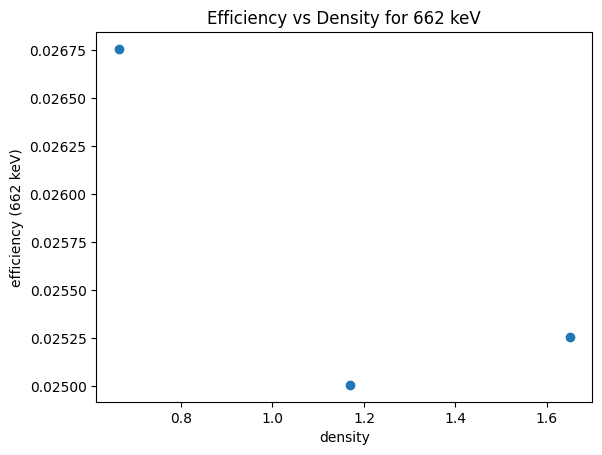

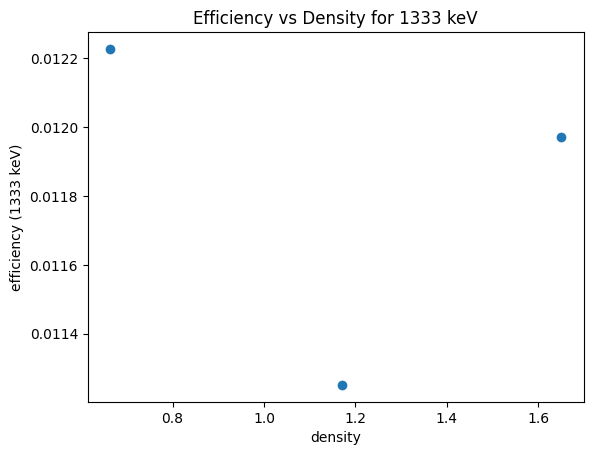

In [43]:
# plot efficiencies vs density for 662 keV for bottles other than 2339312
efficiencies_662 = [bottle_efficiencies[name][662] for name in calibration_names if name not in ['2339311', '2339312']]
densities = [manifest[name]['density'] for name in calibration_names if name not in ['2339311', '2339312']]
# efficiencies_662 = [bottle_efficiencies[name][662] for name in calibration_names]
# densities = [manifest[name]['density'] for name in calibration_names]

plt.scatter(densities, efficiencies_662)
plt.xlabel('density')
plt.ylabel('efficiency (662 keV)')
plt.title('Efficiency vs Density for 662 keV')
plt.show()

efficiencies_1333 = [bottle_efficiencies[name][1333] for name in calibration_names if name not in ['2339311', '2339312']]
densities = [manifest[name]['density'] for name in calibration_names if name not in ['2339311', '2339312']]

plt.scatter(densities, efficiencies_1333)
plt.xlabel('density')
plt.ylabel('efficiency (1333 keV)')
plt.title('Efficiency vs Density for 1333 keV')
plt.show()

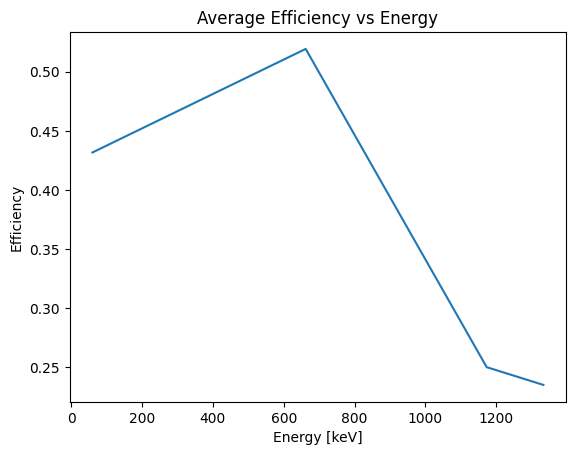

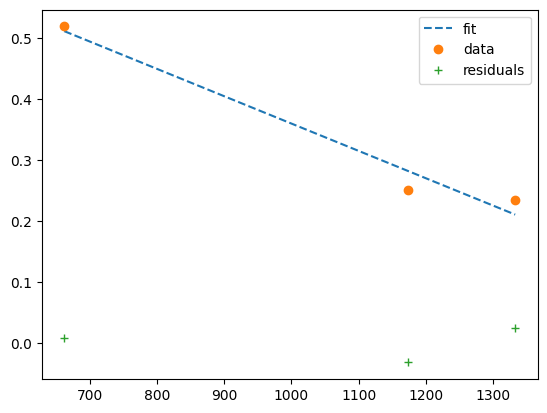

In [37]:
efficiency_60 = np.mean([bottle_efficiencies[name][60] for name in calibration_names])
efficiency_662 = np.mean([bottle_efficiencies[name][662] for name in calibration_names])
efficiency_1173 = np.mean([bottle_efficiencies[name][1173] for name in calibration_names])
efficiency_1333 = np.mean([bottle_efficiencies[name][1333] for name in calibration_names])

plt.plot([60, 662, 1173, 1333], [efficiency_60, efficiency_662, efficiency_1173, efficiency_1333])
plt.xlabel('Energy [keV]')
plt.ylabel('Efficiency')
plt.title('Average Efficiency vs Energy')
plt.show()

x = np.array([662, 1173, 1333])
y = np.array([efficiency_662, efficiency_1173, efficiency_1333])
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

xp = np.linspace(x[0],x[-1],100)
plt.plot(xp,p(xp),"--", label='fit')
plt.plot(x,y,'o', label='data')
plt.plot(x, y - p(x), '+', label='residuals')
plt.legend()
plt.show()

def efficieny_from_energy(x):
    if x < 662:
        return p(662)
    else:
        return p(x)



/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/rebin.py:57: RebinWarning: The last input edge is smaller than the last output edge, zeros will padded on the right side of the new spectrum
  warnings.warn(
/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/spectrum.py:837: SpectrumWarning: Subtraction of counts-based specta, spectra have been converted to CPS
  warnings.warn(


<Axes: xlabel='Energy [keV]', ylabel='Countrate [1/s]'>

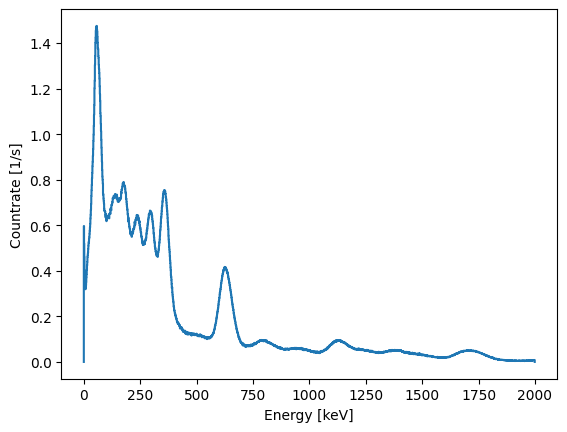

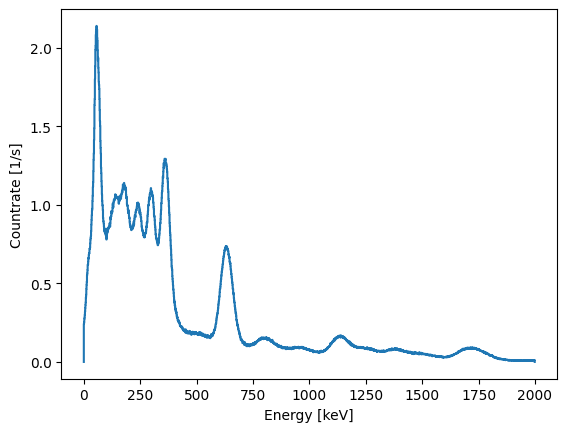

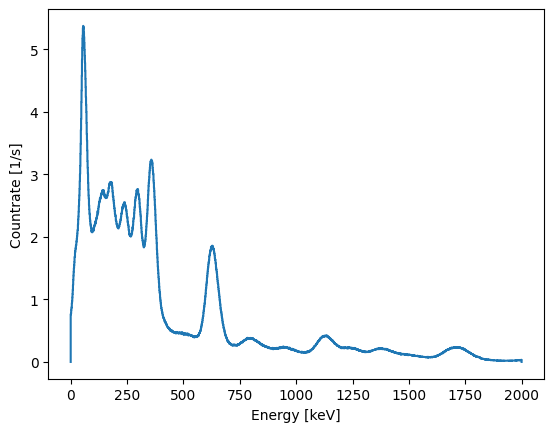

In [2]:
soil_low = utils.get_corrected_spectrum("soil_tailing11")
soil_medium = utils.get_corrected_spectrum("soil_tailing3")
soil_high = utils.get_corrected_spectrum("soil_openpit")

soil_low.plot()
soil_medium.plot()
soil_high.plot()



139.09031967500871


/home/percy/Documents/586projectdata/.venv/lib/python3.12/site-packages/becquerel/core/fitting.py:987: FittingWarning: `lmfit` error estimates are unreliable. `minuit` is recommended where possible
  warnings.warn(


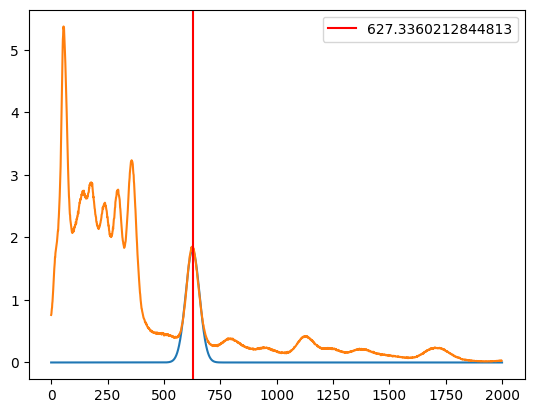

{'gauss_amp': np.float64(139.09031967500866), 'gauss_mu': np.float64(627.3360212844813), 'gauss_sigma': np.float64(30.815936221393176)}


In [48]:
cps_soil_high, fitter_soil_high = utils.get_cps_peak(soil_high, 627)
print(cps_soil_high)
x_plot = np.linspace(0, 2000, 2000)
gaussian_params = fitter_soil_high.best_values
# y_plot = fitter_soil_high.model.components[0].eval(x_plot, **gaussian_params)
y_plot = fitter_soil_high.eval(x_plot, **gaussian_params)
plt.plot(x_plot, y_plot)
plt.plot(soil_high.cps_vals)
plt.axvline(x=gaussian_params['gauss_mu'], color='r', label=f'{gaussian_params["gauss_mu"]}')
plt.legend()
plt.show()

print(gaussian_params)
